In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

In [ ]:
data = pd.read_csv(r"/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding="latin1", header=None)

In [ ]:
data.shape

(1600000, 6)

In [ ]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
columns = ["sentiment", "ids", "date", "flag", "user", "tweet"]
data.columns= columns
data.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df = data[["tweet", "sentiment"]].copy()
df.head()

,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


Kütüphaneler İçe Aktarılır: re, nltk, stopwords, wordcloud

Stopwordler Tanımlanır: NLTK'den indirilir, ekstra anlamsız kelimeler eklenir.

Tweet Temizleme Fonksiyonu (clean_tweet) ile:

Küçük harfe dönüştürülür.

URL’ler kaldırılır.

Mention ve hashtag’ler temizlenir.

Özel karakterler ve sayılar silinir.

Kelimeler ayrılır, stopword’ler çıkarılır, köklerine indirgenir.

Not genişlemesi yapılır.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(["amp", "rt", "lt", "gt"])

stemmer = PorterStemmer()

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https?://\S+", "", tweet)
    tweet = re.sub(r"@\w+|#", "", tweet)
    tweet = re.sub(r"[^\w\s]|[\d]", "", tweet)
    tweet = " ".join([stemmer.stem(word) for word in tweet.split() if word not in stop_words])
    return tweet

df["clean_tweet"] = df["tweet"].apply(clean_tweet)
df.head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,sentiment,clean_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,awww that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,0,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,0,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,0,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",0,behav im mad cant see


In [ ]:
df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})
df.head()

,tweet,sentiment,clean_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,Negative,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,Negative,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,Negative,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",Negative,behav im mad cant see


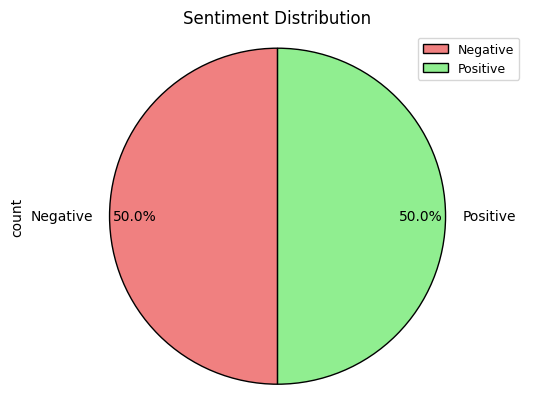

In [ ]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="pie",
                                    autopct='%1.1f%%',
                                    pctdistance=0.85,
                                    startangle=90,
                                    colors=["lightcoral", "lightgreen"],
                                    wedgeprops={'edgecolor': 'black'})

plt.title('Sentiment Distribution')
plt.axis('equal')
plt.legend(labels=df["sentiment"].value_counts().index,
           loc='upper right', fontsize=9)
plt.show()

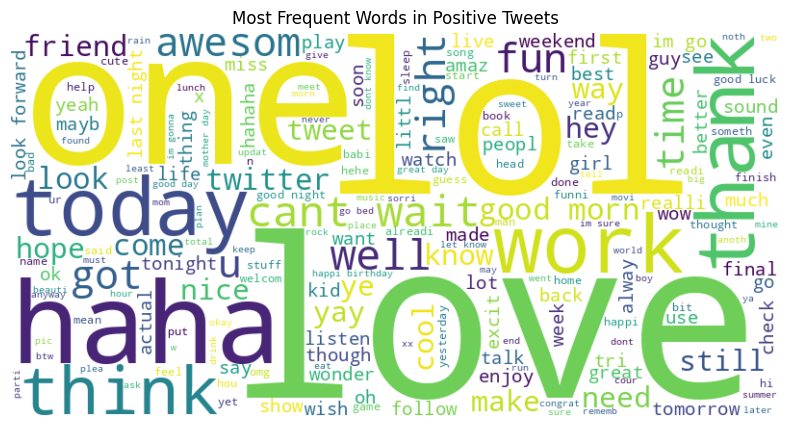

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_words = " ".join(df[df["sentiment"] == "Positive"]["clean_tweet"])
negative_words = " ".join(df[df["sentiment"] == "Negative"]["clean_tweet"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Positive Tweets")
plt.show()

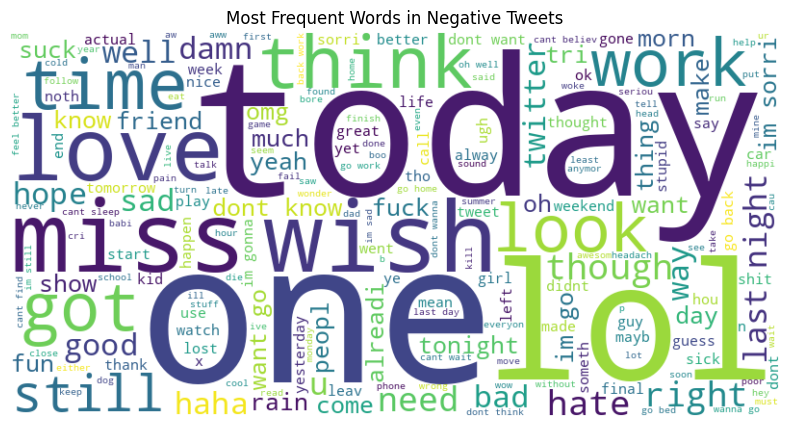

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Tweets")
plt.show()

In [ ]:
df["tweet_length"] = df["clean_tweet"].apply(lambda x: len(x.split()))
df.head()

,tweet,sentiment,clean_tweet,tweet_length
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww that bummer shoulda got david carr third day,9
1,is upset that he can't update his Facebook by ...,Negative,upset cant updat facebook text might cri resul...,12
2,@Kenichan I dived many times for the ball. Man...,Negative,dive mani time ball manag save rest go bound,9
3,my whole body feels itchy and like its on fire,Negative,whole bodi feel itchi like fire,6
4,"@nationwideclass no, it's not behaving at all....",Negative,behav im mad cant see,5


In [ ]:
zero_len = df[df["tweet_length"]==0][["tweet" ,"clean_tweet","tweet_length"]]
display(zero_len.shape)
zero_len.head()

(7090, 3)

,tweet,clean_tweet,tweet_length
208,@mandayyy,,0
249,@mandayyy,,0
282,@ITS_NEMESIS -------,,0
398,@danadearmond,,0
430,@anistorm,,0


In [ ]:
df = df[df["tweet_length"] != 0].reset_index(drop = True)
df = df.drop_duplicates(subset=['clean_tweet'], keep='first')
display(df.shape)

(1475147, 4)

In [ ]:
tweet_len = df.groupby(["sentiment"]).agg(
   mean = ("tweet_length", "mean")
)

tweet_len = tweet_len.transpose()
tweet_len

sentiment,Negative,Positive
mean,7.694833,7.345752


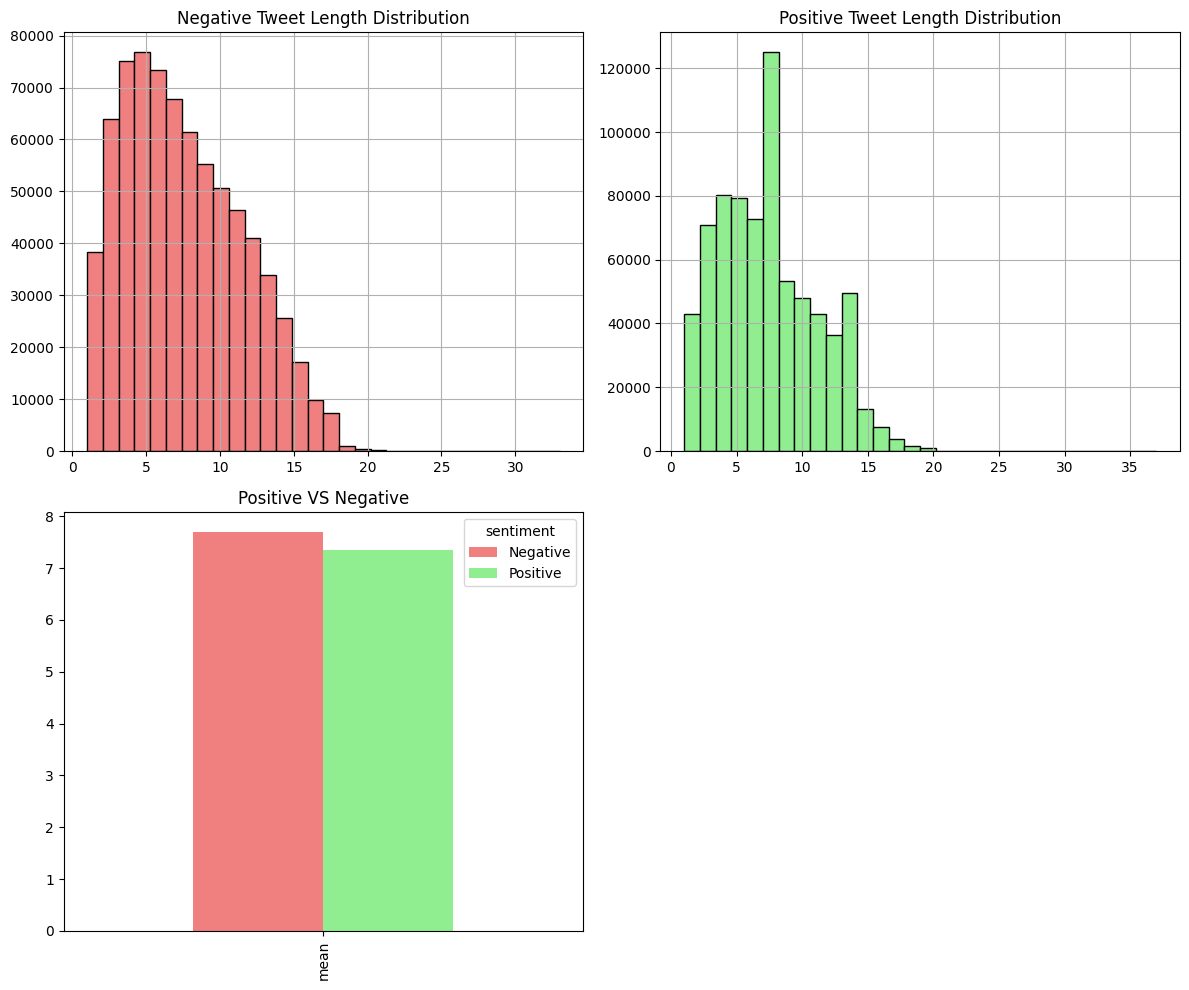

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


df[df["sentiment"]=="Negative"]["tweet_length"].hist(color="lightcoral", edgecolor="black", ax=axes[0, 0], bins=30)
df[df["sentiment"]=="Positive"]["tweet_length"].hist(color="lightgreen", edgecolor="black", ax=axes[0, 1], bins=30)
tweet_len.plot(kind="bar", color = ("lightcoral", "lightgreen"), ax = axes[1, 0] )

axes[0, 0].set_title("Negative Tweet Length Distribution")
axes[0, 1].set_title("Positive Tweet Length Distribution")
axes[1, 0].set_title("Positive VS Negative")
fig.delaxes(axes[1,1])

plt.tight_layout()
plt.show()

Polarity Nedir?

- TextBlob(text).sentiment.polarity ifadesi, bir metnin duygusal yönünü (tonunu) ölçer.

- Dönüş aralığı: -1.0 ile 1.0 arasıdır.

Polarity Değerlerinin Anlamı:


- > 0	Pozitif duygu (mutluluk vb.)
- < 0	Negatif duygu (öfke, üzüntü)
- = 0	Nötr duygu (tarafsız, düz)

In [ ]:
from textblob import TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['clean_tweet'].apply(get_polarity)

In [ ]:
def polarity_to_emotion(polarity):
    if polarity > 0.3:
        return 'joy'
    elif polarity < -0.3:
        return np.random.choice(['sadness', 'anger', 'fear'])
    else:
        return np.random.choice(['neutral', 'anticipation'])

df['emotion'] = df['polarity'].apply(polarity_to_emotion)

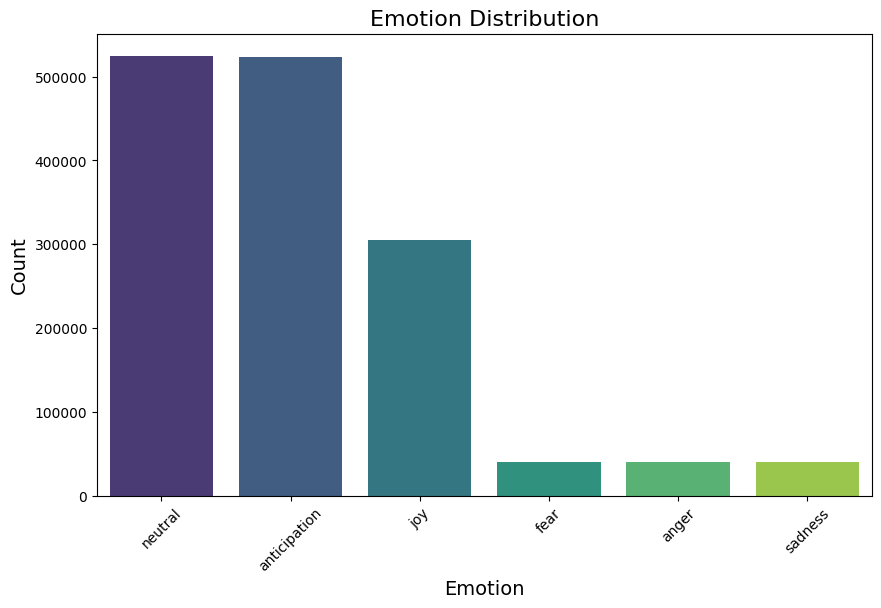

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='emotion', data=df, order=df['emotion'].value_counts().index, palette='viridis')
plt.title('Emotion Distribution', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

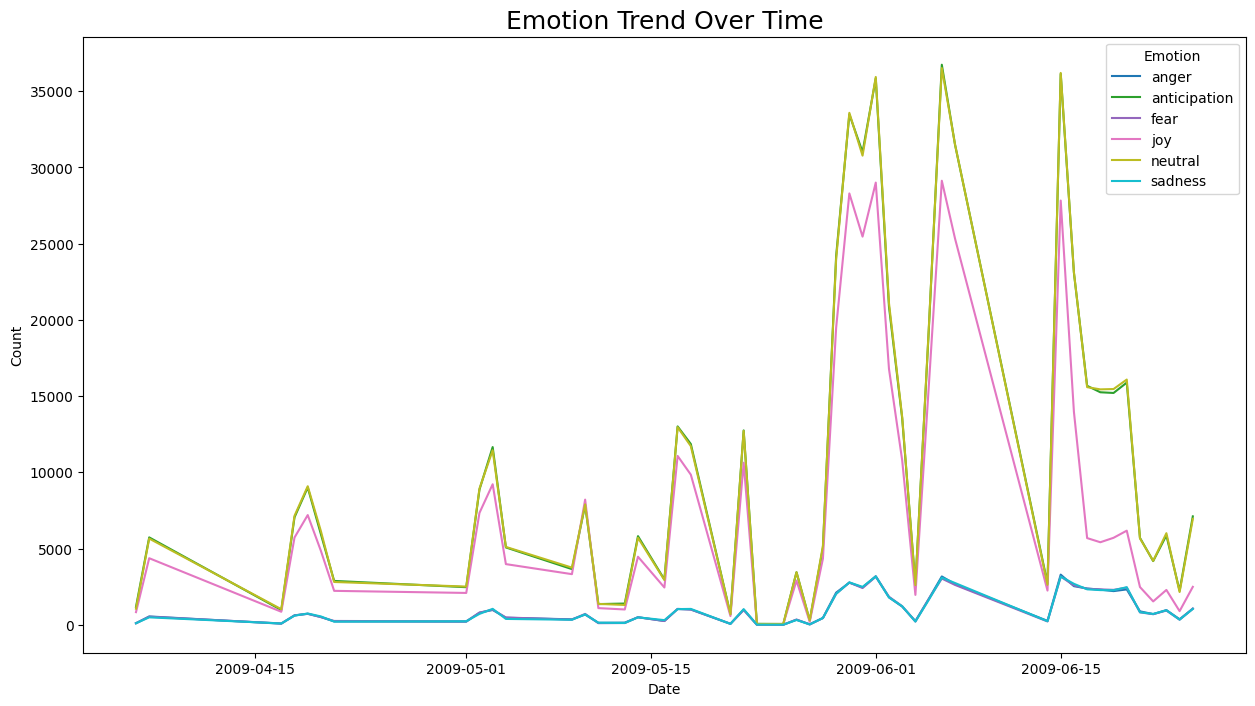

In [ ]:
#df=data
# Step 1: Convert date to string first (if it's not already)
df['date'] = df['date'].astype(str)

# Step 2: Remove timezone words like PDT, EDT, etc.
df['date'] = df['date'].str.replace(r'\s+[A-Z]{2,4}\s+', ' ', regex=True)

# Step 3: Now safely parse to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date and emotion
trend = df.groupby([df['date'].dt.date, 'emotion']).size().unstack(fill_value=0)

# Plot
trend.plot(figsize=(15,8), colormap='tab10')
plt.title('Emotion Trend Over Time', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


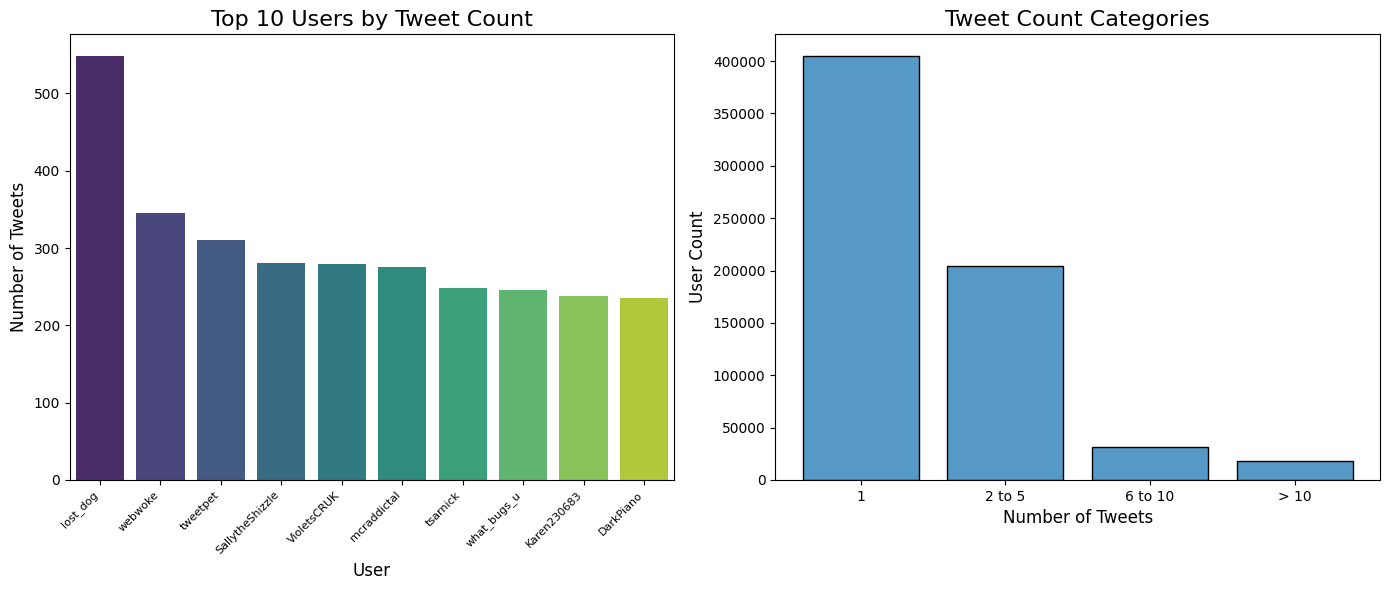

In [ ]:
# Step 1: Clean the data from infinities (important to avoid FutureWarning)
tweet_user_count = df['user'].value_counts().reset_index()
tweet_user_count.columns = ['user', 'count']
tweet_user_count.replace([np.inf, -np.inf], np.nan, inplace=True)
tweet_user_count.dropna(inplace=True)

# Step 2: Get Top 10 Tweeters
top_10_tweeters = tweet_user_count.sort_values(by='count', ascending=False).head(10)

# Step 3: Categorize users based on number of tweets
tweet_user_count['number of tweets'] = pd.cut(tweet_user_count['count'],
                                              bins=[0, 1, 5, 10, 1000],
                                              labels=['1', '2 to 5', '6 to 10', '> 10'])

# Step 4: Create the plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

# Plot 1: Top 10 Tweeters
sns.barplot(data=top_10_tweeters, x='user', y='count', palette='viridis', ax=ax1)
ax1.set_xticklabels(top_10_tweeters['user'], rotation=45, ha='right', fontsize=8)
ax1.set_title('Top 10 Users by Tweet Count', fontsize=16)
ax1.set_xlabel('User', fontsize=12)
ax1.set_ylabel('Number of Tweets', fontsize=12)

# Plot 2: Tweet Count Categories
sns.histplot(data=tweet_user_count, x='number of tweets', discrete=True, shrink=0.8, ax=ax2)
ax2.set_title('Tweet Count Categories', fontsize=16)
ax2.set_xlabel('Number of Tweets', fontsize=12)
ax2.set_ylabel('User Count', fontsize=12)

# Final layout
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
most_common_words = Counter(" ".join(data["tweet"]).split()).most_common(50)

x,y = zip(*most_common_words)

plt.bar(x, y)
plt.xticks(rotation=45)
plt.title("50 Most Common Words in Tweets",size=20)

plt.tight_layout()
plt.show()